In [3]:
import matplotlib.pyplot as plt

def count_elem(cluster):
    _, e1, e2 = cluster
    if isinstance(e1, tuple):
        e1_num = count_elem(e1)
    else:
        e1_num = 1
    if isinstance(e2, tuple):
        e2_num = count_elem(e2)
    else:
        e2_num = 1
    return e1_num + e2_num

def scale_names(name_labels):
    leaf_node_len = len(max(name_labels, key = len)) + 2 # One space on either side
    leaf_node_str = []
    for name in name_labels:
        nr_spaces = leaf_node_len - len(name)
        half_nr_spaces_1 = int((nr_spaces+1)/2)
        half_nr_spaces_2 = int(nr_spaces/2)
        leaf_node_str.append(" " * half_nr_spaces_1 + name + " " * half_nr_spaces_2)
    return leaf_node_str

def rescale(cluster, ratio):
    ## Rescales the clusters so the printing can be based on a 0-100 scale.
    dist, e1, e2 = cluster
    if isinstance(e1, tuple):
        e1 = rescale(e1, ratio) #rescale the rest 
    if isinstance(e2, tuple):
        e2 = rescale(e2, ratio) #rescale the rest 
    dist_n = int(round(dist*ratio))
    return (dist_n, e1, e2)

def get_u(name_len):
    
    indent = int(name_len/2)
    u_str =  indent * " " + name_len * "-" + "\n"
    u_str += 2*(indent * " " + "|" + (name_len-2) * " " + "|" + "\n")
    
    return u_str

# def dictionarify(cluster, name_labels):
#     """
#     Creates list of dictionaries [{i, dist, e1, e2}]
#     If e1/e2 is a tuple, it will be a reference to the i of that tuple.
#     """
#     dist, e1, e2 = cluster
#     if not isinstance(e1, tuple):
#         e1_list = [{'i':i, 'dist':dist, 'e1',}]
#     else:
#         e1_list = dictionarity
    
def print_cluster(cluster, name_labels):
    name_len = len(name_labels[0]) ## All lenghts should be the same from preprocessing
    nr_entries = len(name_labels)
    dist, e1, e2 = cluster
    
    if not isinstance(e1, tuple):
        str1 = name_labels[e1]
    else:
        str1 = name_len * "-"
    if not isinstance(e2, tuple):
        str2 = name_labels[e2]
    else:
        str2 = name_len * "-"   
    end_string = get_u(name_len)
    end_string += str1+str2
    print(end_string)
    
name_labels1 = ["Ant","Aardvark","Beaver","Crocodile"]    
name_labels2 = ["Ant","Bee"]
name_labels3 = ["Ant","Aardvark","Beaver"]    
cluster1 = (11.5,(4.2,2,3),(2.1,0,1))
cluster2 = (4.2,0,1)
cluster3 = (11.5,(4.2,2,1),0)
#print(get_u(5))
#Get the base names spaced out properly
scaled_names = scale_names(name_labels2)

#Rescale the data
max_height, _, _ = cluster2 ## First cluster has biggest difference by definition. Assume it's not zero
ratio = 100/max_height 
rescaled = rescale(cluster2, ratio) ## Scale to 100.

#Print 
print_cluster(rescaled, scaled_names)


  -----
  |   |
  |   |
 Ant  Bee 


[  0.   4.  44.  45.  47.  50.  64.  67.  69.  98.   1.  17.  22.  28.
  55.   6.  65.  70.  36.  49.  15.  24.  40.  27.  19.  18.  92.   2.
  12.  38.  61.  34.  82.  81.  43.  83. 100.  11.  57.  16.  33.  79.
 101. 115. 118.  35.   9. 119.  48. 120.  68.  52.  25.  26.  89.  14.
 121.  30. 123.  42.  97.  39.  84.  96.  32. 127. 133.   7.  86.  62.
 137. 140.  21.  23. 142.  41.  56.  71.  58.  87.  95.  63.  29.  74.
  13. 134. 155. 157. 162.  90.  75. 169.  76. 170. 190. 186. 195. 181.
  53.  72.]
[  3.  10. 102. 103. 104. 105. 106. 107. 108. 109.   5. 111. 112. 113.
 114.  31. 116. 117.  94.  54.  46.  88.  51.  93.  66.  60. 126.   8.
 128. 129. 130.  73. 132.  99.  59. 135. 136.  20. 138.  37.  78. 141.
 110. 143. 144. 145. 146. 147. 148. 149. 150.  91. 152. 153. 154.  85.
 156. 122. 158. 159. 160. 161. 124. 163. 164. 131. 166. 167. 168.  80.
 139. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 151. 165. 125.
  77. 185. 182. 187. 188. 189. 183. 184. 192. 193. 191. 194. 196.

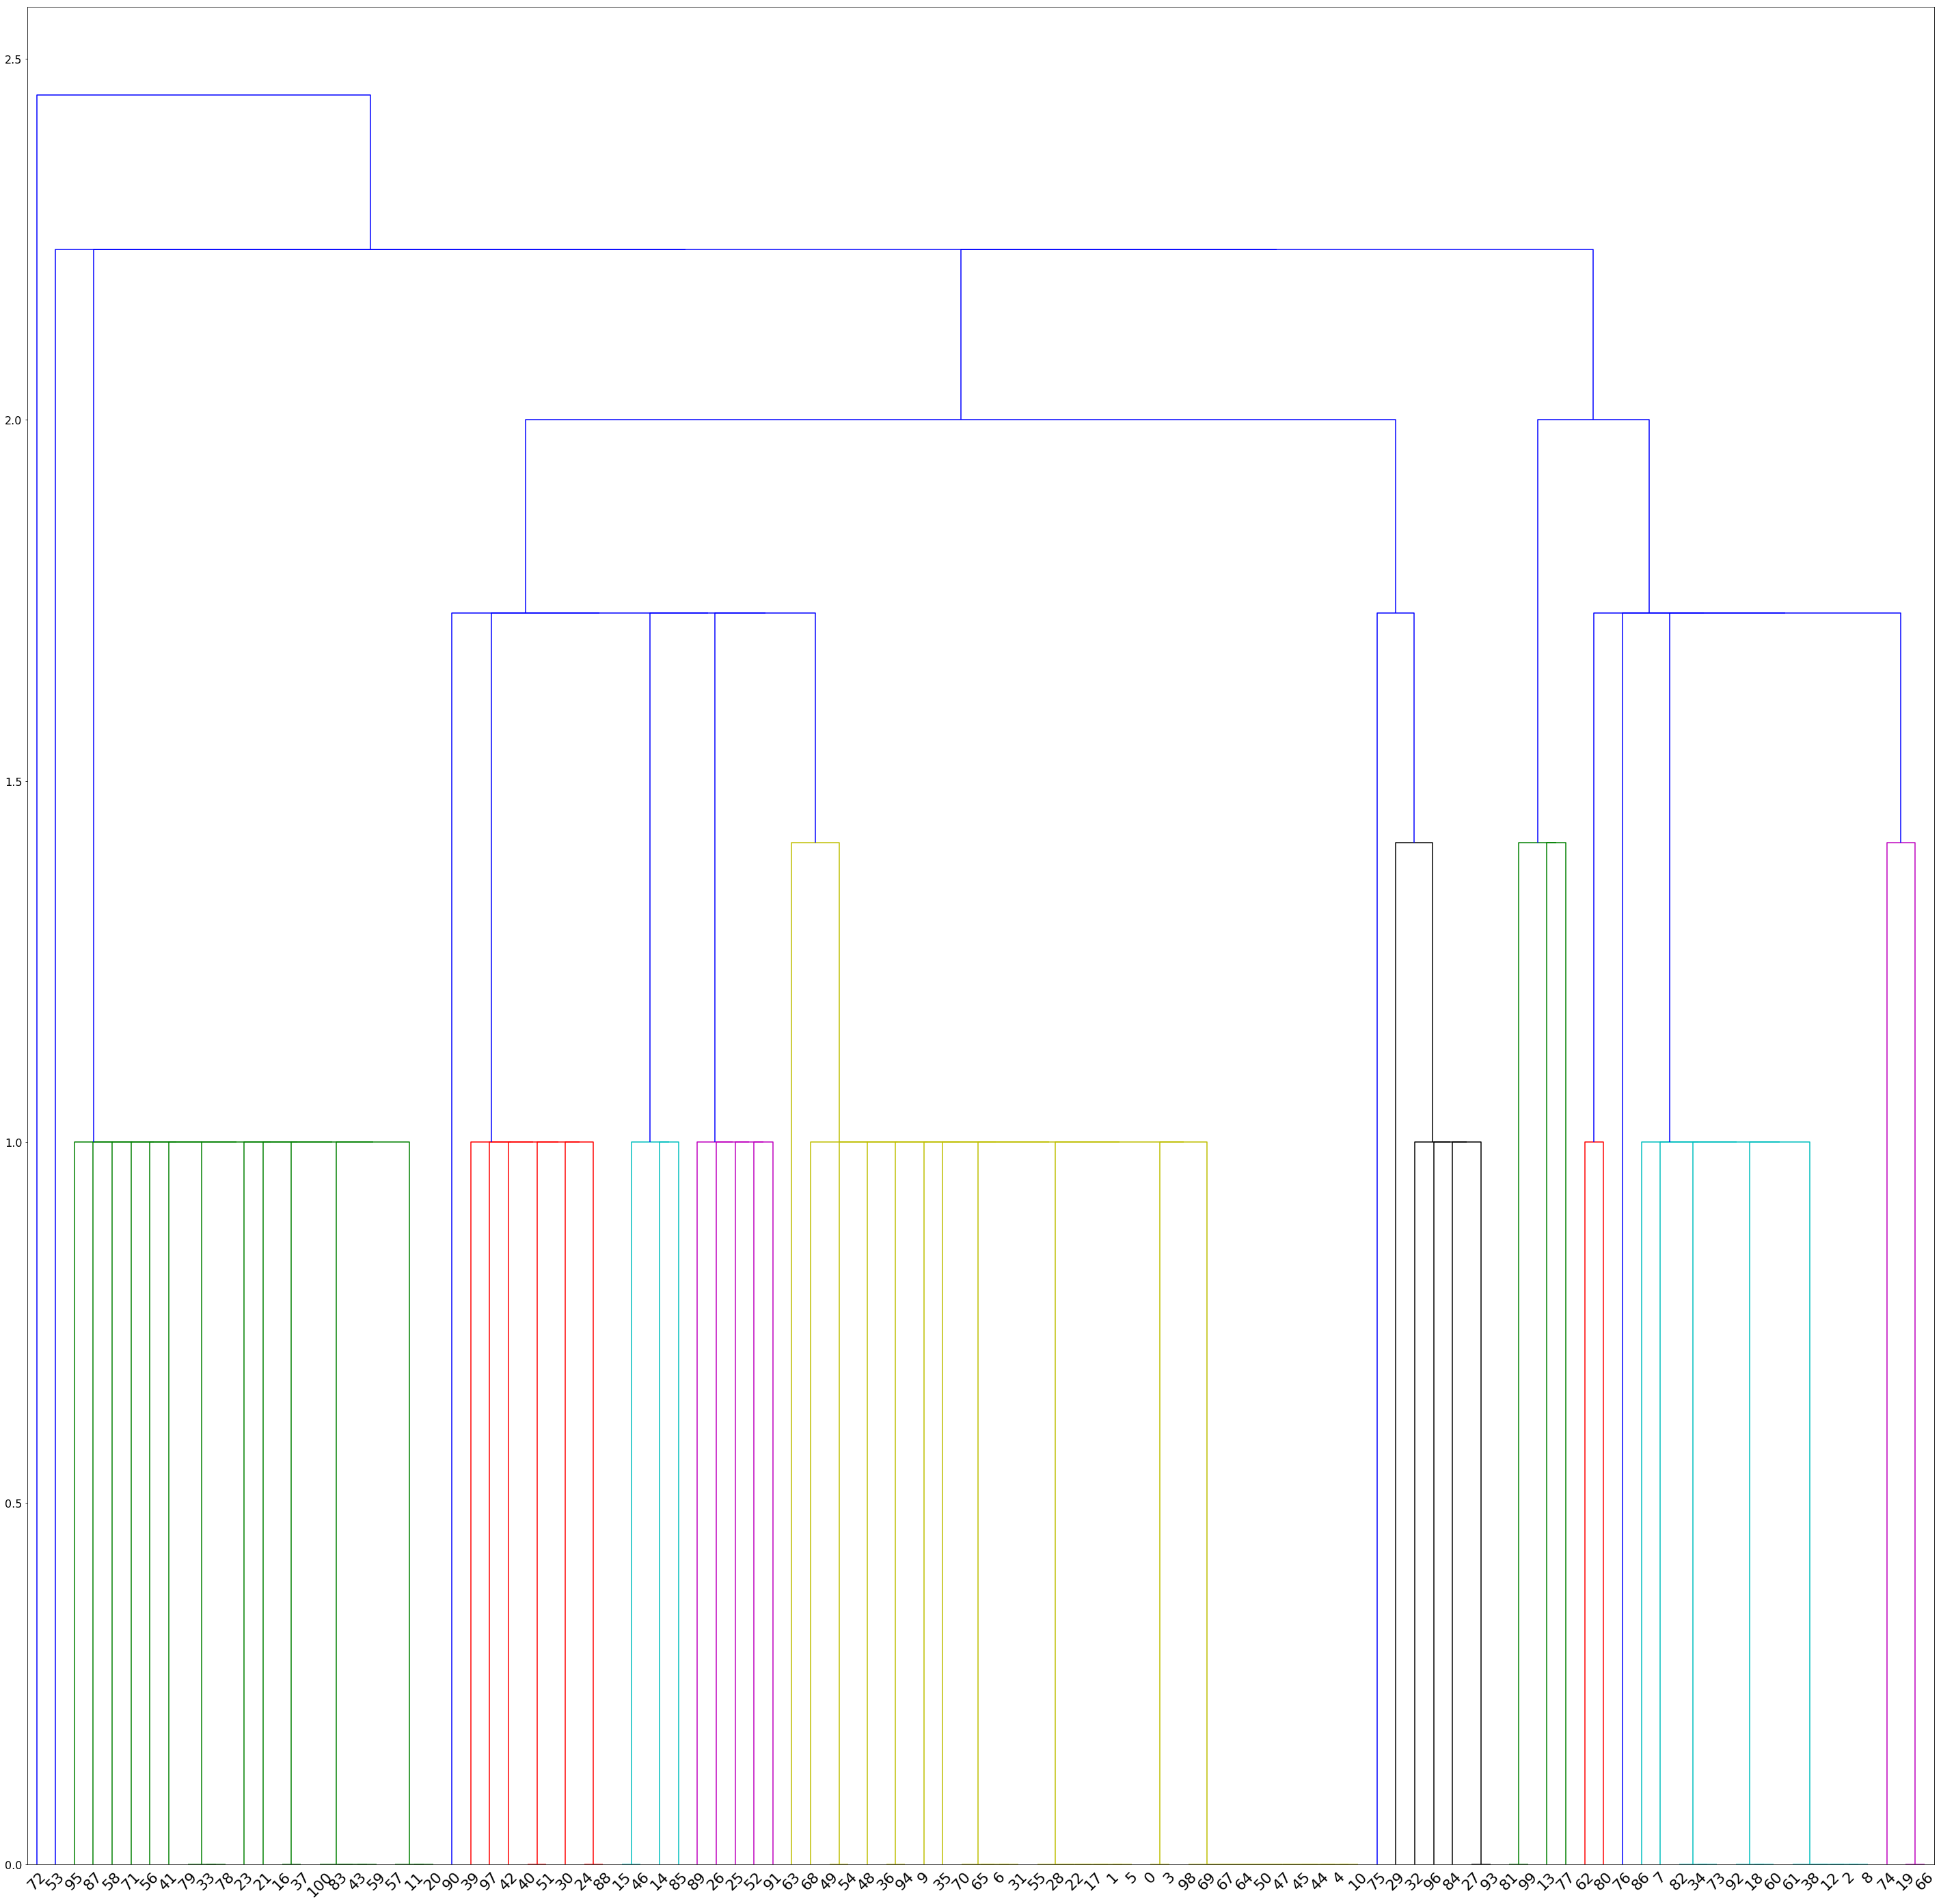

In [48]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as h

data, classes, names = prepare_data("zoo.csv")
Z = h.linkage(data, method='single', metric='euclidean')

def col(i):
    return Z[:,i]

def prepare_data(filename):
    '''
    Assumes data is in csv format
    '''
    df = pd.read_csv(filename).values
    classes = df[:,-1]
    names = df[:,0]
    data = df[:,1:len(df[0])-1]
    return data, classes, names

print(col(0)) ## Indices of the animals
print(col(1)) ## Distances
print(col(3))
#print(Z)
plt.figure(figsize = (50,50))
plt.rcParams.update({'font.size': 22})
h.dendrogram(Z, leaf_font_size = 22, leaf_rotation = 45)#, labels = names)
#plt.savefig('dendrogram.png')
plt.show()